# SciANN-Regression.py

An illustrain to use SciANN simple linear and quadratic curve-fitting.

For additional details, please check our paper at: https://arxiv.org/abs/2005.08803 
    
Created by Ehsan Haghighat on 5/01/20.

In [2]:
# You need to have tensorflow, keras, and sciann installed in your system. 
# On google cloud, uncomment next line to install sciann. 

# !pip install sciann 

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import sciann as sn 

# SciANN for Linear Regression  

The objective is to fit NN on data generated from 
$$
y = 2x+1+\epsilon, \quad \epsilon \sim N(0,\sigma^2) = \sigma N(0,1)
$$

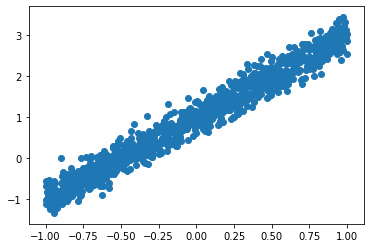

In [5]:
x_data = np.linspace(-1, 1, 1000)
y_data = 2*x_data + 1
y_data += 0.2*np.std(y_data)*np.random.randn(1000)

plt.scatter(x_data, y_data)

## Step 1
The first step is to define the approxmation using neural networks. The simplest neural network is a linear regression model, i.e., a network 
without any hidden layers:  

In [6]:
x = sn.Variable('x')
o = sn.Field('y')
y = sn.Functional(o, x)

You can check initial values of network weights and biasses as:

In [7]:
y.get_weights()

[[array([[0.2330153]], dtype=float32), array([0.04398651], dtype=float32)]]

You can eval a functional using the `eval' function:

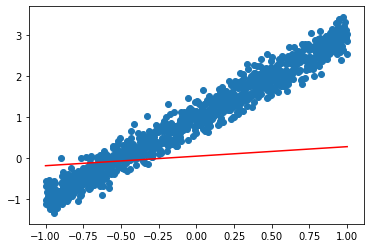

In [8]:
y_pred = y.eval(x_data)

plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred, 'r')

## Step 2
The second step is the define the optimization model, i.e., main inputs of the network and targets (objtives). This is done using SciModel interface:

In [9]:
d1 = sn.Data(y)
m = sn.SciModel(x, d1)

Once the model is defined, we can use the `train' function to identify the parameters of the network: 

In [10]:
m.train(x_data, y_data, learning_rate=0.01)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 10us/sample - loss: 1.7889
Epoch 2/100
1000/1000 [==============================] - 0s 8us/sample - loss: 1.3710
Epoch 3/100
1000/1000 [==============================] - 0s 8us/sample - loss: 1.0310
Epoch 4/100
1000/1000 [==============================] - 0s 8us/sample - loss: 0.7774
Epoch 5/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.5805
Epoch 6/100
1000/1000 [==============================] - 0s 8us/sample - loss: 0.4401
Epoch 7/100
1000/1000 [==============================] - 0s 8us/sample - loss: 0.3360
Epoch 8/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.2589
Epoch 9/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.2040
Epoch 10/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.1635
Epoch 11/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.1329
Epoch 12/100
1000/1000 [=====

1000/1000 [==============================] - 0s 7us/sample - loss: 0.0536
Epoch 85/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0536
Epoch 86/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0536
Epoch 87/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0536
Epoch 88/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0536
Epoch 89/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0536
Epoch 90/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0536
Epoch 91/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0536
Epoch 92/100
  64/1000 [>.............................] - ETA: 0s - loss: 0.0406
Epoch 00092: ReduceLROnPlateau reducing learning rate to 7.812499825377017e-05.
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0536
Epoch 93/100
1000/1000 [==============================] - 0s 8us/sample - loss: 0.

We can now re-evaluate the network as:

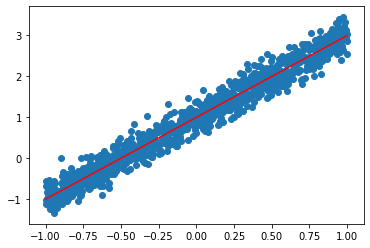

In [11]:
y_pred = y.eval(x_data)

plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred, 'r')

The final values of weights and biases are obtained: 

In [12]:
y.get_weights()

[[array([[2.0024283]], dtype=float32), array([0.9946451], dtype=float32)]]

As you find, these are very close to their true values for data. 

# SciANN for Quadratic Regression 

As the second example, let us assume that we have a the following dataset: 
$$
y = 2x^2 -x + 1 + \epsilon, \quad \epsilon \sim N(0, \sigma^2)
$$

and we wish to perform a quadratic regression using neural networks. 

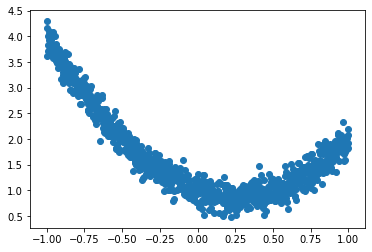

In [13]:
x_data = np.linspace(-1, 1, 1000)
y_data = 2*x_data**2 - x_data + 1 
y_data += 0.2*np.std(y_data)*np.random.randn(1000)
plt.scatter(x_data, y_data)

## Step 1

Again, we first need to define the approximation space, i.e., the quadratic model: 

In [14]:
x = sn.Variable('x')
x2 = sn.Variable('x2')
y = sn.Functional('y', [x, x2])

Initial state of the approximation can be evaluated as:

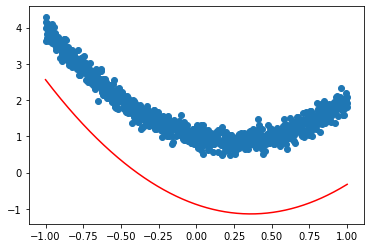

In [15]:
y_pred = y.eval([x_data, x_data**2])

plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred, 'r')

## Step 2

Defining the optimization model and training the network:

In [16]:
d1 = sn.Data(y)
m = sn.SciModel([x, x2], d1)
m.train([x_data, x_data**2], y_data, learning_rate=0.02)

Train on 1000 samples
Epoch 1/100
1000/1000 [==============================] - 0s 11us/sample - loss: 2.9253
Epoch 2/100
1000/1000 [==============================] - 0s 9us/sample - loss: 1.6943
Epoch 3/100
1000/1000 [==============================] - 0s 9us/sample - loss: 0.9165
Epoch 4/100
1000/1000 [==============================] - 0s 9us/sample - loss: 0.4907
Epoch 5/100
1000/1000 [==============================] - 0s 8us/sample - loss: 0.2835
Epoch 6/100
1000/1000 [==============================] - 0s 8us/sample - loss: 0.1945
Epoch 7/100
1000/1000 [==============================] - 0s 8us/sample - loss: 0.1569
Epoch 8/100
1000/1000 [==============================] - 0s 8us/sample - loss: 0.1345
Epoch 9/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.1181
Epoch 10/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.1039
Epoch 11/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0913
Epoch 12/100
1000/1000 [=====

1000/1000 [==============================] - 0s 8us/sample - loss: 0.0270
Epoch 87/100
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0270
Epoch 88/100
  64/1000 [>.............................] - ETA: 0s - loss: 0.0204
Epoch 00088: ReduceLROnPlateau reducing learning rate to 0.0003124999930150807.
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0270
Epoch 89/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0270
Epoch 90/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0270
Epoch 91/100
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0270
Epoch 92/100
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0270
Epoch 93/100
1000/1000 [==============================] - 0s 8us/sample - loss: 0.0270
Epoch 94/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.0270
Epoch 95/100
1000/1000 [==============================] - 0s 7us/sample - loss: 0.

We can finally evaluate the network as: 


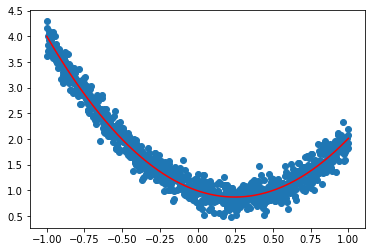

In [17]:
y_pred = y.eval([x_data, x_data**2])

plt.scatter(x_data, y_data)
plt.plot(x_data, y_pred, 'r')

The weights and biasses of the network are obtained as: 

In [18]:
y.get_weights()

[[array([[-0.9942032],
         [ 2.0144627]], dtype=float32),
  array([0.9917945], dtype=float32)]]